<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---

>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Maquinas de Aprendizaje/Tarea 3

/content/drive/My Drive/Maquinas de Aprendizaje/Tarea 3


In [3]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

# Create a copy of df to analyze it later
df_copy = df
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,y_value
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,7.400000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.166667
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,8.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,6.000000
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.000000


> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [4]:
#procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre

#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable

#any more information?
df.drop(['date'], axis=1, inplace=True) #delete date

df.head()

,meantemp,humidity,wind_speed,meanpressure,y_value,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,7.400000,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,7.166667,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,8.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,6.000000,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,7.000000,5,2013,1,0,0,0,1


> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [0]:
y = df.pop("y_value").values
X = df.values

X_train = X[:1000]
y_train = y[:1000]

X_val = X[1000:]
y_val = y[1000:]

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

> a) Describa el problema trabajado, la cantidad de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.

**Respuesta:**

El problema a resolver, tal como se menciona en el enunciado, consiste en predecir la temperatura media de un día futuro, a partir de parámetros conocidos para temperatura, humedad, velocidad del viento y presión atmosférica de un día en curso o días pasados.

Asimismo, la cantidad de registros es igual a $1.461$ y el número de atributos del conjunto de datos es $12$, una vez que se extrae información a partir de cada una de las fechas.

Dicho esto, se puede analizar la variación de ciertos atributos a través del tiempo. Por ejemplo, de la temperatura y la humedad medias:

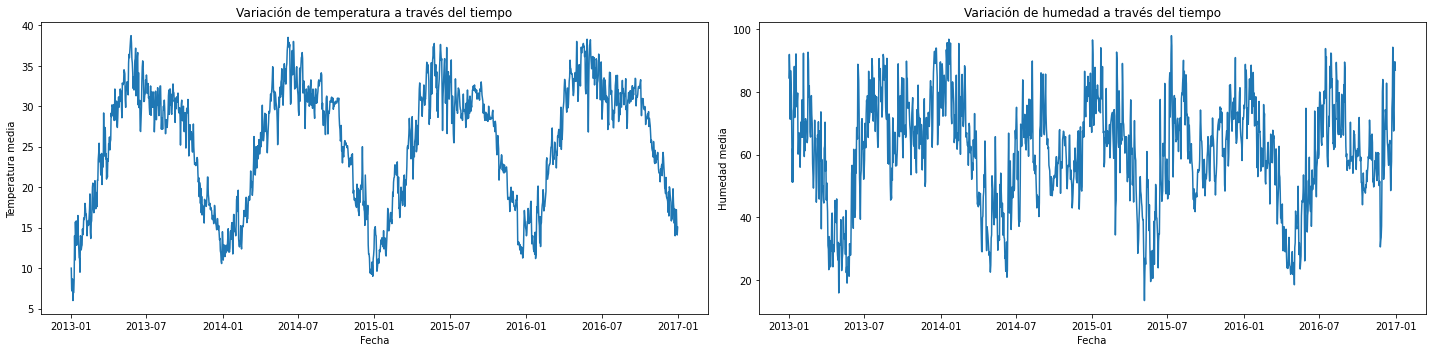

In [6]:
import matplotlib.pyplot as plt
from pandas import plotting

plotting.register_matplotlib_converters()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

axes[0].set_title('Variación de temperatura a través del tiempo')
axes[0].plot(df_copy['date'], df_copy['meantemp'], label='Secuencia')
axes[0].set_xlabel("Fecha")
axes[0].set_ylabel("Temperatura media")

axes[1].set_title('Variación de humedad a través del tiempo')
axes[1].plot(df_copy['date'], df_copy['humidity'], label='Secuencia')
axes[1].set_xlabel("Fecha")
axes[1].set_ylabel("Humedad media")

fig.tight_layout()
plt.show()

En ambos casos, es posible visualizar que, cada año, se repiten patrones de comportamiento de acuerdo a ciertos meses y/o estaciones del año. Por esto mismo, se considera que evaluar sólo los datos del día anterior para generar una predicción de temperatura media no es lo ideal. Es más, la evaluación del comportamiento de $x$ atributo, en ese mismo período, para años anteriores, podría ser un indicador crítico a la hora de tomar decisiones sobre cómo entrenar el modelo y predecir temperaturas.

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?

**Respuesta:**

In [7]:
import numpy as np

def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

from sklearn.tree import DecisionTreeRegressor as Tree

def do_Tree(x, y, xv, yv, max_depth=None, min_samples_split=2):
    model_unr = Tree() #unregularized model -- default parameters
    model_unr.set_params(max_depth=max_depth, min_samples_split=min_samples_split)
    model_unr.fit(X_train,y_train)

    train_acc = model_unr.score(x,y)
    val_acc = model_unr.score(xv,yv)
    return model_unr, train_acc, val_acc

non_regularized, nr_train_acc, nr_val_acc = do_Tree(X_train, y_train, X_val, y_val)

#define your regularized tree model
regularized, r_train_acc, r_val_acc = do_Tree(X_train, y_train, X_val, y_val, 4, 2)

print("Accuracy Train (NR): " + str(nr_train_acc) + "\nAccuracy Validation (NR): " + str(round(nr_val_acc, 2)) + 
      "\n\nAccuracy Train (R): " + str(round(r_train_acc, 2)) + "\nAccuracy Validation (R): " + str(round(r_val_acc, 2)))

Accuracy Train (NR): 1.0
Accuracy Validation (NR): 0.88

Accuracy Train (R): 0.95
Accuracy Validation (R): 0.94


La gran ventaja asociada a utilizar árboles de decisión radica en que no es necesario escalar los datos, dado que escalarlos sólo los reubica en el espacio, modificando los valores numéricos. No obstante, no se modifica el resultado final.

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.

**Respuesta:**

Árbol No Regularizado:
- RMSE train = 0.0
- RMSE val = 2.48

Árbol Regularizado:
- RMSE train = 1.66
- RMSE val = 1.73 



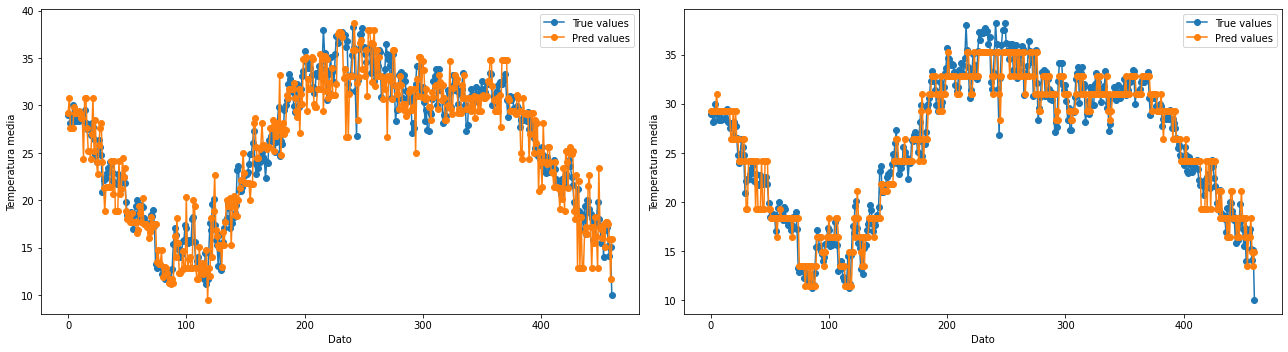

In [8]:
y_train_hat_nr = non_regularized.predict(X_train)
y_val_hat_nr = non_regularized.predict(X_val)

y_train_hat_r = regularized.predict(X_train)
y_val_hat_r = regularized.predict(X_val)

print("Árbol No Regularizado:")
print("- RMSE train =", round(RMSE(y_train, y_train_hat_nr), 2))
print("- RMSE val =", round(RMSE(y_val, y_val_hat_nr), 2))

print("\nÁrbol Regularizado:")
print("- RMSE train =", round(RMSE(y_train, y_train_hat_r), 2))
print("- RMSE val =", round(RMSE(y_val, y_val_hat_r), 2), "\n")

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].plot(range(0, len(y_val)), y_val, label="True values", marker='o')
axes[0].plot(range(0, len(y_val)), y_val_hat_nr, label="Pred values", marker='o')
axes[0].set_xlabel("Dato")
axes[0].set_ylabel("Temperatura media")
axes[0].legend()

axes[1].plot(range(0, len(y_val)), y_val, label="True values", marker='o')
axes[1].plot(range(0, len(y_val)), y_val_hat_r, label="Pred values", marker='o')
axes[1].set_xlabel("Dato")
axes[1].set_ylabel("Temperatura media")
axes[1].legend()

fig.tight_layout()
plt.show()

Es posible observar que el RMSE para el conjunto de validación en el *árbol regularizado* es significativamente inferior al RMSE obtenido para el conjunto de validación en el *árbol no regularizado*. Asimismo, se observa que la regresión para el *árbol regularizado* generaliza de mejor manera que el *no regularizado*, para el cual se observa una mayor tendencia al sobreajuste.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

**Respuesta:**

Se procede a crear los modelos de Bagging para cada valor de $n$, variando exponencialmente la cantidad de estimadores en cada iteración. Luego, se obtienen las predicciones de cada modelo para los conjuntos de entrenamiento y validación, con el propósito de evaluar un posible overfitting y para contrastar sus RMSE. Todo esto, utilizando la misma configuración del inciso anterior para el árbol regularizado: $max_{depth} = 4 $ y $min_{samples\_split} = 2$.

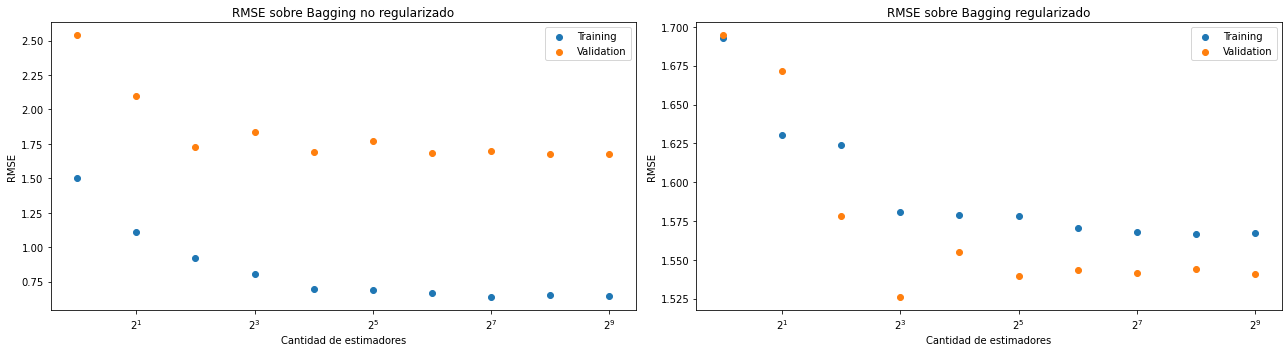

In [9]:
from sklearn.ensemble import BaggingRegressor

def do_Bagging(x, y, max_depth=None, min_samples_split=2, n=2):
    model_bag = BaggingRegressor(base_estimator=Tree(max_depth=max_depth, min_samples_split=min_samples_split), n_estimators=n)
    model_bag.fit(X_train, y_train)
    return model_bag

nr_bagging = []
r_bagging = []

estimators = list(map(lambda x: 2**x, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
for estimator in estimators:
    nr_bagging.append(do_Bagging(X_train, y_train, n=estimator))
    r_bagging.append(do_Bagging(X_train, y_train, max_depth=4, min_samples_split=2, n=estimator))

#define your non-regularized bagging model
bnr_train = list()
bnr_val = list()
for i in nr_bagging:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    bnr_train.append(RMSE(y_train, y_train_hat))
    bnr_val.append(RMSE(y_val, y_val_hat))

#define your regularized bagging model
br_train = list()
br_val = list()
for i in r_bagging:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    br_train.append(RMSE(y_train, y_train_hat))
    br_val.append(RMSE(y_val, y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(18, 5))

ax1[0].scatter(estimators, bnr_train ,label="Training")
ax1[0].scatter(estimators, bnr_val ,label="Validation")
ax1[0].set_title("RMSE sobre Bagging no regularizado")
ax1[0].set_xlabel("Cantidad de estimadores")
ax1[0].set_ylabel("RMSE")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, br_train ,label="Training")
ax1[1].scatter(estimators, br_val ,label="Validation")
ax1[1].set_title("RMSE sobre Bagging regularizado")
ax1[1].set_xlabel("Cantidad de estimadores")
ax1[1].set_ylabel("RMSE")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

fig1.tight_layout()
plt.show()

Para el árbol no regularizado, se observa que una cantidad de árboles de, aproximadamente, $n=2^5$ entrega un RMSE relativamente bajo sin sobrecargar recursos computacionales. Asimismo, para el caso del árbol regularizado, basta con $n=2^3$ árboles de decisión para obtener un RMSE considerablemente bajo a nivel del conjunto de validación.

En cuanto al overfitting, se observa que, en el árbol no regularizado, el modelo tiende a sobreajustarse. Esto mismo pudo visualizarse en el caso anterior, para el cual se trabajó con un único árbol.

En ambos casos, se observa que el RMSE disminuye y tiende a ser constante a medida que aumenta la cantidad de estimadores. En consecuencia, es válido concluir que el ensamblado mediante bagging permite obtener mejores resultados que un sólo árbol de regresión.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

**Respuesta:**

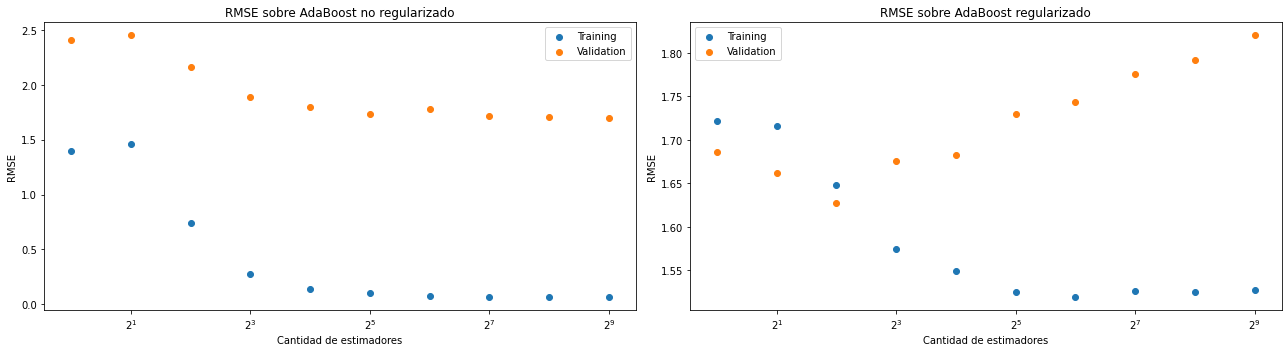

In [10]:
from sklearn.ensemble import AdaBoostRegressor

def do_AdaBoost(x, y, max_depth=None, min_samples_split=2, n=2):
    model_ada = AdaBoostRegressor(base_estimator=Tree(max_depth=max_depth, min_samples_split=min_samples_split), n_estimators=n)
    model_ada.fit(X_train, y_train)
    return model_ada

nr_ada = []
r_ada = []

estimators = list(map(lambda x: 2**x, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
for estimator in estimators:
    nr_ada.append(do_AdaBoost(X_train, y_train, n=estimator))
    r_ada.append(do_AdaBoost(X_train, y_train, max_depth=4, min_samples_split=2, n=estimator))

#define your non-regularized adaboost model
anr_train = list()
anr_val = list()
for i in nr_ada:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    anr_train.append(RMSE(y_train, y_train_hat))
    anr_val.append(RMSE(y_val, y_val_hat))

#define your regularized adaboost model
ar_train = list()
ar_val = list()
for i in r_ada:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    ar_train.append(RMSE(y_train, y_train_hat))
    ar_val.append(RMSE(y_val, y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(18, 5))

ax1[0].scatter(estimators, anr_train ,label="Training")
ax1[0].scatter(estimators, anr_val ,label="Validation")
ax1[0].set_title("RMSE sobre AdaBoost no regularizado")
ax1[0].set_xlabel("Cantidad de estimadores")
ax1[0].set_ylabel("RMSE")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, ar_train ,label="Training")
ax1[1].scatter(estimators, ar_val ,label="Validation")
ax1[1].set_title("RMSE sobre AdaBoost regularizado")
ax1[1].set_xlabel("Cantidad de estimadores")
ax1[1].set_ylabel("RMSE")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

fig1.tight_layout()
plt.show()

Con respecto al comportamiento de los RMSE para cada gráfico, se observa que, para AdaBoost no regularizado, existe overfitting para todas las instancias evaluadas. Asimismo, y de manera contraria al caso de Bagging, los árboles regularizados presentan underfitting al principio y, a medida que aumenta la cantidad de estimadores, el modelo tiende a presentar overfitting.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.

**Respuesta:**

Utilizando las mismas configuraciones de parámetros que en los casos anteriores, se tiene que:

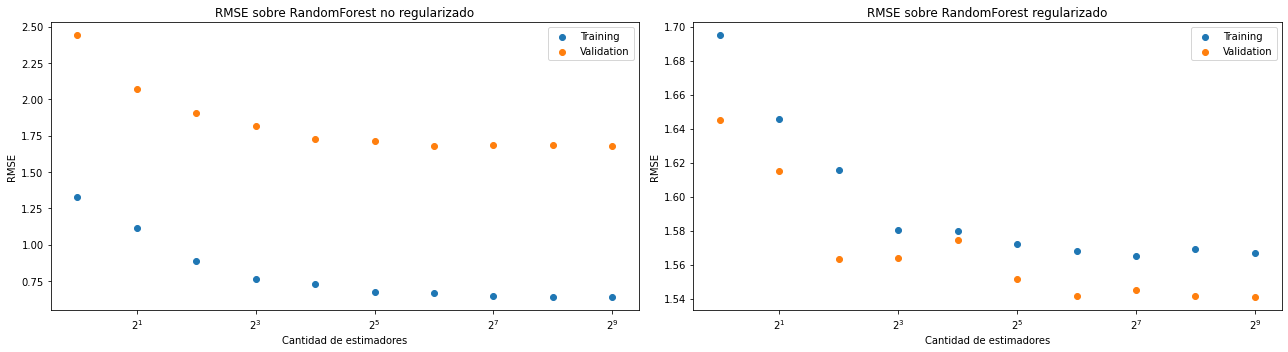

In [11]:
from sklearn.ensemble import RandomForestRegressor

def do_RandomForest(x, y, max_depth=None, min_samples_split=2, n=2):
    model_ada = RandomForestRegressor(max_depth=max_depth, min_samples_split=min_samples_split, n_estimators=n)
    model_ada.fit(X_train, y_train)
    return model_ada

nr_rf = []
r_rf = []

estimators = list(map(lambda x: 2**x, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
for estimator in estimators:
    nr_rf.append(do_RandomForest(X_train, y_train, n=estimator))
    r_rf.append(do_RandomForest(X_train, y_train, max_depth=4, min_samples_split=2, n=estimator))

#define your non-regularized randomforest model
rfnr_train = list()
rfnr_val = list()
for i in nr_rf:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    rfnr_train.append(RMSE(y_train, y_train_hat))
    rfnr_val.append(RMSE(y_val, y_val_hat))

#define your regularized randomforest model
rfr_train = list()
rfr_val = list()
for i in r_rf:
    y_train_hat = i.predict(X_train)
    y_val_hat = i.predict(X_val)
    rfr_train.append(RMSE(y_train, y_train_hat))
    rfr_val.append(RMSE(y_val, y_val_hat))

fig1, ax1 = plt.subplots(1, 2, figsize=(18, 5))

ax1[0].scatter(estimators, rfnr_train ,label="Training")
ax1[0].scatter(estimators, rfnr_val ,label="Validation")
ax1[0].set_title("RMSE sobre RandomForest no regularizado")
ax1[0].set_xlabel("Cantidad de estimadores")
ax1[0].set_ylabel("RMSE")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, rfr_train ,label="Training")
ax1[1].scatter(estimators, rfr_val ,label="Validation")
ax1[1].set_title("RMSE sobre RandomForest regularizado")
ax1[1].set_xlabel("Cantidad de estimadores")
ax1[1].set_ylabel("RMSE")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

fig1.tight_layout()
plt.show()

En este caso, nuevamente es posible observar overfitting en el caso no regularizado. No obstante, se observa un ajuste aceptable en el caso regularizado.


> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).

In [0]:
def compare(model, X_val, y_val):
    oob_error = model.oob_score
    val_error = model.score(X_val,y_val)
    return oob_error, val_error

**Respuesta:**

Para el caso de Bagging, ocurre que:

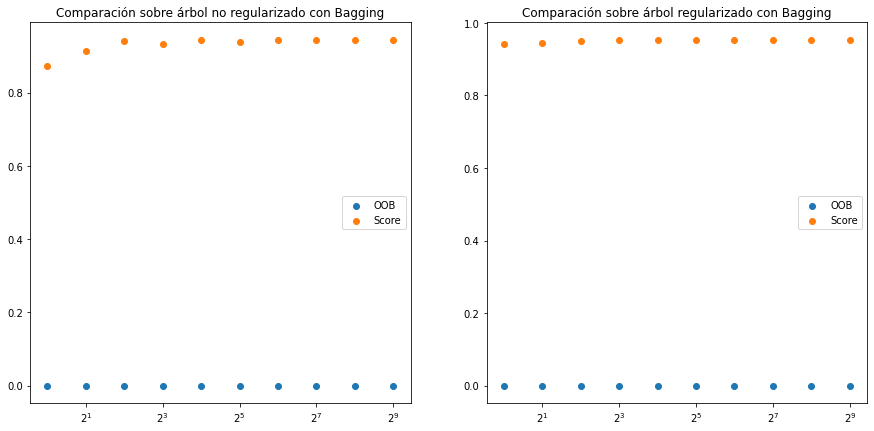

In [23]:
# OOB para Bagging no regularizado
oob_bnr = []
val_bnr = []
for i in nr_bagging:
    oob, val = compare(i, X_val, y_val)
    oob_bnr.append(oob)
    val_bnr.append(val)

# OOB para Bagging regularizado
oob_br = []
val_br = []
for i in r_bagging:
    oob, val = compare(i, X_val, y_val)
    oob_br.append(oob)
    val_br.append(val)
    
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, oob_bnr ,label="OOB")
ax1[0].scatter(estimators, val_bnr ,label="Score")
ax1[0].set_title("Comparación sobre árbol no regularizado con Bagging")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, oob_br ,label="OOB")
ax1[1].scatter(estimators, val_br ,label="Score")
ax1[1].set_title("Comparación sobre árbol regularizado con Bagging")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

Para el caso de RandomForest ocurre lo siguiente:

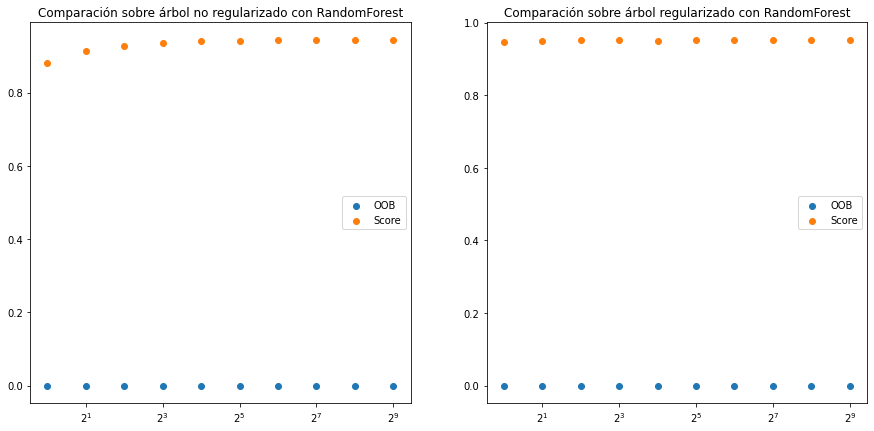

In [25]:
# OOB para RandomForest no regularizado
oob_rfnr = []
val_rfnr = []
for i in nr_rf:
    oob, val = compare(i, X_val, y_val)
    oob_rfnr.append(oob)
    val_rfnr.append(val)

# OOB para RandomForest regularizado
oob_rfr = []
val_rfr = []
for i in r_rf:
    oob, val = compare(i, X_val, y_val)
    oob_rfr.append(oob)
    val_rfr.append(val)
    
fig1, ax1 = plt.subplots(1, 2, figsize=(15, 7))

ax1[0].scatter(estimators, oob_rfnr ,label="OOB")
ax1[0].scatter(estimators, val_rfnr ,label="Score")
ax1[0].set_title("Comparación sobre árbol no regularizado con RandomForest")
ax1[0].set_xscale('log', basex=2)
ax1[0].legend(loc="best")

ax1[1].scatter(estimators, oob_rfr ,label="OOB")
ax1[1].scatter(estimators, val_rfr ,label="Score")
ax1[1].set_title("Comparación sobre árbol regularizado con RandomForest")
ax1[1].set_xscale('log', basex=2)
ax1[1].legend(loc="best")

plt.show()

En ambos casos, OOB es sustancialmente inferior al error calculado sobre el conjunto de validación, por lo que OOB no se considera como una métrica de generalización útil en este caso.

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos.

In [31]:
def combine_predictions(predictions):
    predictions = np.array(predictions)
    return np.median(predictions, axis=0)

list_estimators = model.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ", RMSE(y_val, new_predictions))

RMSE val=  1.6177300388055091


> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.

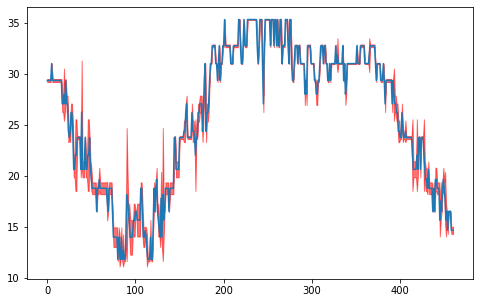

In [32]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100

from scipy.stats import norm
interv_val = []

for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])

interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])

plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

**-----**

>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.

**Respuesta:**

De acuerdo a lo analizado, se procederá a evaluar el conjunto de pruebas con el modelo entrenado para Bagging regularizado, con los parámetros definidos anteriormente:

In [0]:
df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

# procesamiento de fecha(datetime/timestamp) a numeros
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
# based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df["season_fall"] = 0
df["season_rainy"] = 0
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
# any more information?
df.drop(["date"], axis=1, inplace=True) #delete date

y_test = df.pop("y_value").values
X_test = df.values

X_test, y_test = shuffle(X_test, y_test, random_state=0) #shuffle values on train only

In [41]:
model = do_Bagging(X_train, y_train, max_depth=4, min_samples_split=2, n=2)

value = model.predict(X_test)
print("El RMSE para el conjunto de pruebas es:", RMSE(y_test, value))

El RMSE para el conjunto de pruebas es: 1.680855188895102


Al contrastarlo con el valor obtenido para los conjuntos de entrenamiento y validación, $RMSE_T = 1,630$ y $RMSE_V$ = 1,675 respectivamente, se puede concluir que el RMSE obtenido para el conjunto de pruebas es razonable y se encuentra dentro del rango esperado.

El uso de modelos no regularizados no requiere setteo de parámetros, por lo que es intuitivo de aplicar. Sin embargo, los resultados son considerablemente peores que para los modelos regularizados. Por otro lado, los modelos regularizados tienen un mejor desempeño. No obstante, y dependiendo del problema, los valores de los parámetros podrían influir sustancialmente (*tanto de manera positiva como negativa*) en los resultados obtenidos.

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18